# GraphMDL for graph pattern mining

In [1]:
import skmine

print("This tutorial was tested with the following version of skmine :", skmine.__version__)

This tutorial was tested with the following version of skmine : 0.0.9


In this example, we are going to use the GraphMDL+ approach for mining a small set of graph patterns from graph data.

GraphMDL+ is a heuristic anytime algorithm that uses the Minimum Description Length principle to select small but descriptive sets of patterns from graph data. The resulting set of patterns is significantly smaller than the complete set of patterns that can be generated by classic complete algorithms.


In [1]:
# First we import the needed modules
import networkx as nx
from skmine.graph.graphmdl.graph_mdl import GraphMDL
from skmine.graph.graphmdl import utils

First, we create a data graph, from which the patterns will be extracted.


GraphMDL need edges to have exactly one label.

In [2]:
data_graph = nx.DiGraph() # Create new directed graph
#Add eight nodes (from 1 to 8) to the graph
data_graph.add_nodes_from(range(1,9))
#Add some labels to the nodes
data_graph.nodes[1]['label'] = 'y'
data_graph.nodes[2]['label'] = 'x'
data_graph.nodes[3]['label'] = 'z'
data_graph.nodes[4]['label'] = 'x'
data_graph.nodes[5]['label'] = 'z'
data_graph.nodes[6]['label'] = 'x'
data_graph.nodes[7]['label'] = 'z'
data_graph.nodes[8]['label'] = 'w','x' # A node can have multiple labels

#Add edges between nodes
data_graph.add_edge(2,1,label='a')
data_graph.add_edge(4,1,label='a')
data_graph.add_edge(6,1,label='a')
data_graph.add_edge(6,8,label='a')
data_graph.add_edge(8,6,label='a')
data_graph.add_edge(1,3,label='b')
data_graph.add_edge(1,5,label='b')
data_graph.add_edge(1,7,label='b')


We can automatically draw the graph.

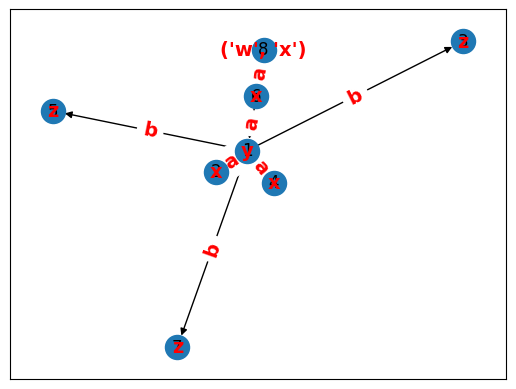

In [3]:
utils.draw_graph(data_graph)

The automatic drawing is not always clear. For illustration purposes, here is a hand-made illustration as well.

![example_data_graph.jpg](example_directed_graph.png)


Now we can run the GraphMDL+ approach on the data graph.

In [4]:
graphmdl = GraphMDL() # Initialize the approach
graphmdl.fit(data_graph, timeout=2.5) # Run the approach on the data graph. Timeout is optional and in seconds.

GraphMDL()

Now we can process the extracted patterns, the initial and the final description length.
For example, we can draw the extracted patterns, as each pattern is a graph, and compute a compression ratio with the description lengths.

In [5]:
patterns = list(graphmdl.patterns())
print("Number of selected patterns",len(patterns))

Number of selected patterns 3


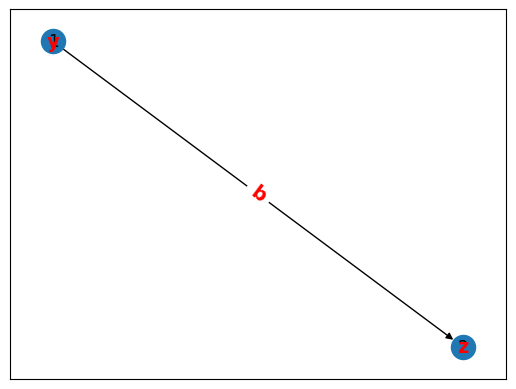

In [6]:
utils.draw_graph(patterns[0])

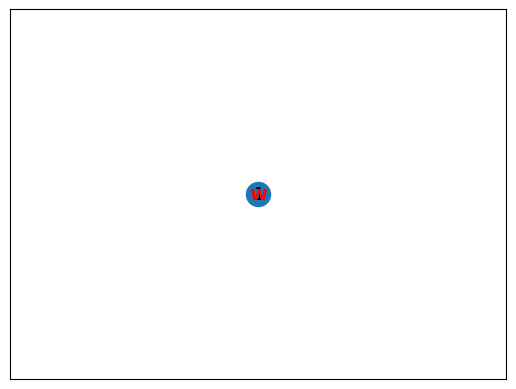

In [7]:
utils.draw_graph(patterns[1])

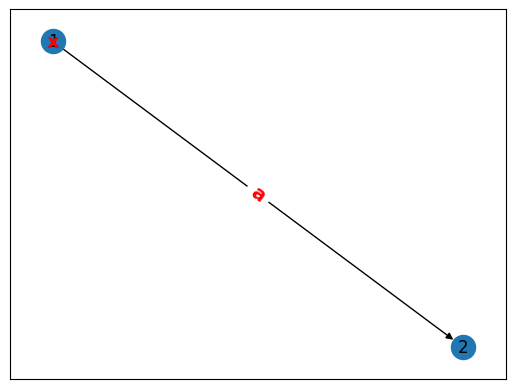

In [8]:
utils.draw_graph(patterns[2])

In [9]:
print(f"initial description length = {graphmdl.initial_description_length()}")
print(f"Final description length = {graphmdl.description_length()}")
print(f"Compression ratio = {round((graphmdl.description_length()/ graphmdl.initial_description_length())*100, 2)} %")

initial description length = 279.5681873994845
Final description length = 136.06648569569322
Compression ratio = 48.67 %
